Importing Libraries

In [664]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Importing Dataset


In [665]:
hA = pd.read_csv('heart.csv')
hA.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Finding numbers of Rows and Columns in Dataset

In [666]:
hA.shape

(1025, 14)

Checking Null Values in Dataset

In [667]:
hA.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Visualization

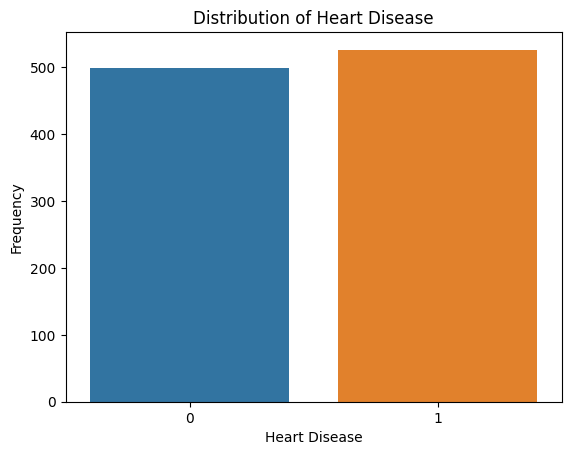

In [668]:
sns.countplot(x='target', data=hA)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Disease')
plt.show()

Text(0, 0.5, 'Frequency')

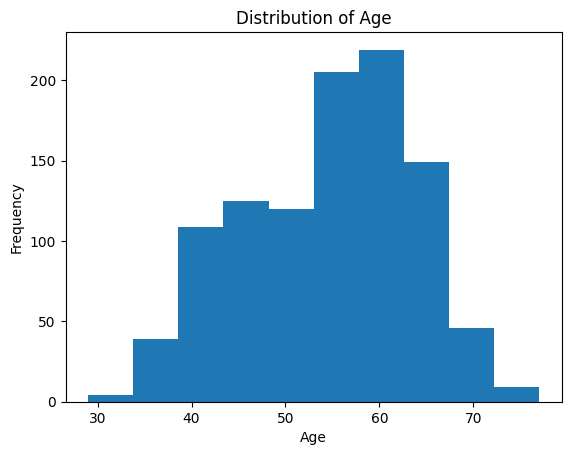

In [669]:
plt.hist(hA["age"],bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

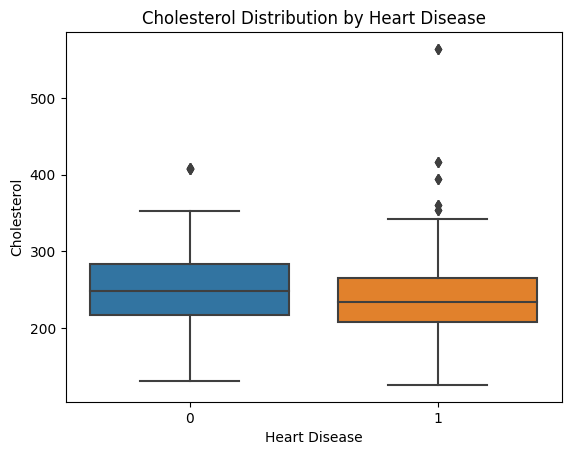

In [670]:
sns.boxplot(x='target', y='chol', data=hA)
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Distribution by Heart Disease')
plt.show()

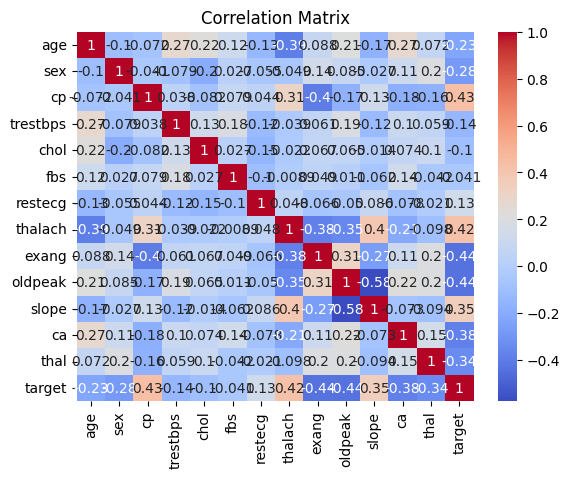

In [671]:
corr_matrix = hA.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


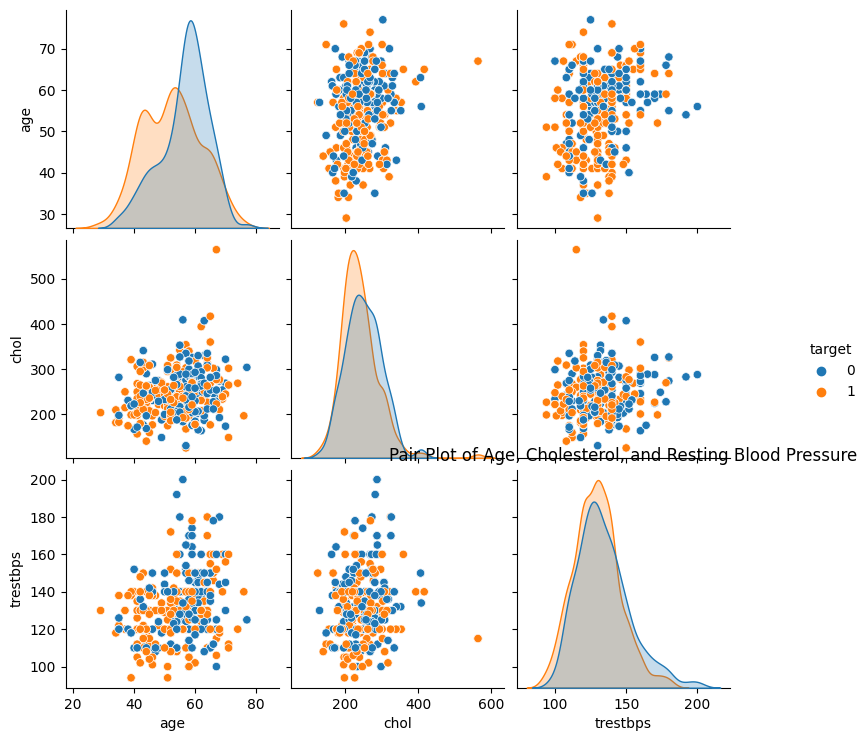

In [672]:
sns.pairplot(hA, vars=['age', 'chol', 'trestbps'], hue='target')
plt.title('Pair Plot of Age, Cholesterol, and Resting Blood Pressure')
plt.show()


Checking Duplicate Values in Dataset

In [673]:
hA_dup = hA.duplicated().any()
hA_dup

True

Dropping Duplicate Values

In [674]:
hA = hA.drop_duplicates()
hA_dups = hA.duplicated().any()
hA_dups

False

Data Pre-processing

In [675]:
cat_values = []
cont_values = []

for columns in hA.columns:
    if hA[columns].nunique() <= 10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

Printing Values

In [676]:
cat_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [677]:
cont_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding Categorical Data

In [678]:
hA['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [679]:
cat_values.remove('sex')
cat_values.remove('target')
hA = pd.get_dummies(hA, columns=cat_values, drop_first=True)

In [680]:
hA.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


Feature Scaling

In [681]:
ss = StandardScaler()
hA[cont_values] = ss.fit_transform(hA[cont_values])

In [682]:
hA.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [683]:
def hatiq(str):
    if str == True:
        return 1
    else:
        return 0
    
hA['cp_1'] = hA['cp_1'].apply(hatiq)    
hA['cp_2'] = hA['cp_2'].apply(hatiq)
hA['cp_3'] = hA['cp_3'].apply(hatiq)
hA['exang_1'] = hA['exang_1'].apply(hatiq)
hA['slope_1'] = hA['slope_1'].apply(hatiq)
hA['slope_2'] = hA['slope_2'].apply(hatiq)
hA['ca_1'] = hA['ca_1'].apply(hatiq)
hA['ca_2'] = hA['ca_2'].apply(hatiq)
hA['ca_3'] = hA['ca_3'].apply(hatiq)
hA['ca_4'] = hA['ca_4'].apply(hatiq)
hA['thal_1'] = hA['thal_1'].apply(hatiq)
hA['thal_2'] = hA['thal_2'].apply(hatiq)
hA['thal_3'] = hA['thal_3'].apply(hatiq)

In [684]:
hA.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Splitting Data into Training and Testing set

In [685]:
x = hA.drop('target', axis=1)
y = hA['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [686]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,False,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,False,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,True,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,True,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,False,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,True,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,False,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,False,...,0,0,1,0,0,0,0,1,0,0


In [687]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

Regression Model

In [688]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [689]:
y_pred = reg.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [690]:
accuracy_score(y_test, y_pred)


0.7868852459016393

KNeigbours Classifier


In [691]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)


KNeighborsClassifier()

In [692]:
knc_pred = knc.predict(x_test)
knc_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [693]:
accuracy_score(y_test,knc_pred)

0.7377049180327869

Random Forest

In [694]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [695]:
rf_pred = rf.predict(x_test)
rf_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [696]:
accuracy_score(y_test, rf_pred)

0.8032786885245902

Visaulization for the best suited model


In [697]:
models = pd.DataFrame({"Models":["LogisticRegression", "KNeighborsClassifier", "RandomForestClassifier"], "Accuracy_score":[accuracy_score(y_test, y_pred), accuracy_score(y_test,knc_pred), accuracy_score(y_test, rf_pred)]})
models

,Models,Accuracy_score
0,LogisticRegression,0.786885
1,KNeighborsClassifier,0.737705
2,RandomForestClassifier,0.803279


<Axes: xlabel='Models', ylabel='Accuracy_score'>

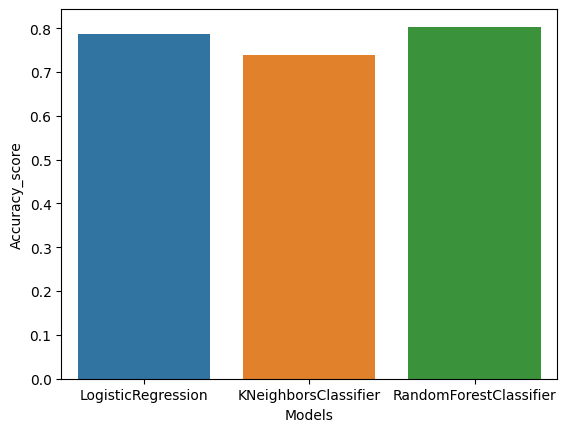

In [698]:
sns.barplot(x=models['Models'],y = models['Accuracy_score'])